In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
plt.rc('font', family='Malgun Gothic')  # Windows
# plt.rc('font', family='AppleGothic')      # Mac
plt.rc('axes', unicode_minus=False)       # '-' 기호를 표시하기 위함
plt.rcParams['font.size'] = 15    # 글자 크기 정하기

In [35]:
# CSV 파일 로드
df = pd.read_csv("./서울시_분기별_자치구별_업종별_상권.csv", encoding='cp949' )

# '연도분기'에서 연도만 추출 (예: 20211에서 2021만 추출)
df['기준_년분기_코드'] = df['기준_년분기_코드'] // 10  # 10으로 나눈 몫을 취함
# 자치구별로 그룹화하고 연도별로 합계 계산
df_data = df.groupby(['자치구_코드_명', '기준_년분기_코드']).sum().reset_index()

# 자치구가 25개만 나오도록 데이터 정리
unique_districts = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', 
                    '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', 
                    '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

filtered_data = df_data[df_data['자치구_코드_명'].isin(unique_districts)]

filtered_data

,자치구_코드_명,기준_년분기_코드,자치구_코드,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,강남구,2019,4672000,CS300043CS300042CS300041CS300040CS300039CS3000...,전자상거래업주유소예술품재생용품 판매점모터사이클및부품자동차부품중고차판매조명용품인테리어...,204360,221771,1480.3,8909,1108.3,6052,17411
1,강남구,2020,4672000,CS300043CS300042CS300041CS300040CS300039CS3000...,전자상거래업주유소예술품재생용품 판매점모터사이클및부품자동차부품중고차판매조명용품인테리어...,212663,229928,1063.8,7158,1023.2,5645,17265
2,강남구,2021,4672000,CS300043CS300042CS300041CS300040CS300039CS3000...,전자상거래업주유소예술품재생용품 판매점모터사이클및부품자동차부품중고차판매조명용품인테리어...,222779,239724,1295.9,9417,851.3,4790,16945
3,강남구,2022,4672000,CS300043CS300042CS300041CS300040CS300039CS3000...,전자상거래업주유소예술품재생용품 판매점모터사이클및부품자동차부품중고차판매조명용품인테리어...,229576,246131,758.2,4635,797.4,5301,16555
4,강남구,2023,4672000,CS300043CS300042CS300041CS300040CS300039CS3000...,전자상거래업주유소예술품재생용품 판매점모터사이클및부품자동차부품중고차판매조명용품인테리어...,226672,242744,806.0,5217,862.9,5926,16072
...,...,...,...,...,...,...,...,...,...,...,...,...
120,중랑구,2019,4458960,CS300043CS300042CS300041CS300040CS300039CS3000...,전자상거래업주유소예술품재생용품 판매점모터사이클및부품자동차부품중고차판매조명용품인테리어...,58589,63601,1459.3,2611,1025.2,1997,5012
121,중랑구,2020,4458960,CS300043CS300042CS300041CS300040CS300039CS3000...,전자상거래업주유소예술품재생용품 판매점모터사이클및부품자동차부품중고차판매조명용품인테리어...,60838,65960,1122.7,2382,949.6,1780,5122
122,중랑구,2021,4458960,CS300043CS300042CS300041CS300040CS300039CS3000...,전자상거래업주유소예술품재생용품 판매점모터사이클및부품자동차부품중고차판매조명용품인테리어...,64910,70114,1311.0,3281,1063.5,1663,5204
123,중랑구,2022,4458960,CS300043CS300042CS300041CS300040CS300039CS3000...,전자상거래업주유소예술품재생용품 판매점모터사이클및부품자동차부품중고차판매조명용품인테리어...,66807,72065,923.4,1605,849.7,1956,5258


In [36]:
data = filtered_data[['기준_년분기_코드', '점포_수']]
data.index = filtered_data['자치구_코드_명']
data= data.rename_axis(mapper='자치구',axis=0)
data

,기준_년분기_코드,점포_수
자치구,,
강남구,2019,204360
강남구,2020,212663
강남구,2021,222779
강남구,2022,229576
강남구,2023,226672
...,...,...
중랑구,2019,58589
중랑구,2020,60838
중랑구,2021,64910


In [38]:
temp = pd.DataFrame(index=data.index.unique(), columns=data['기준_년분기_코드'].unique())

for name, group in data.groupby('자치구'):
    temp.loc[name] = list(group['점포_수'])
    
temp = temp.astype(int)
temp = temp.drop(temp.columns[-1],axis=1)
temp.columns = [str(i) for i in temp.columns]
temp

,2019,2020,2021,2022
자치구,,,,
강남구,204360,212663,222779,229576
강동구,74744,77771,82905,85610
강북구,49028,50900,53705,54892
강서구,94670,100777,108874,113739
관악구,70292,73251,77498,79393
광진구,67453,69748,73032,75036
구로구,81649,84172,88362,90499
금천구,60307,63269,66864,68232
노원구,65734,68265,73425,75567


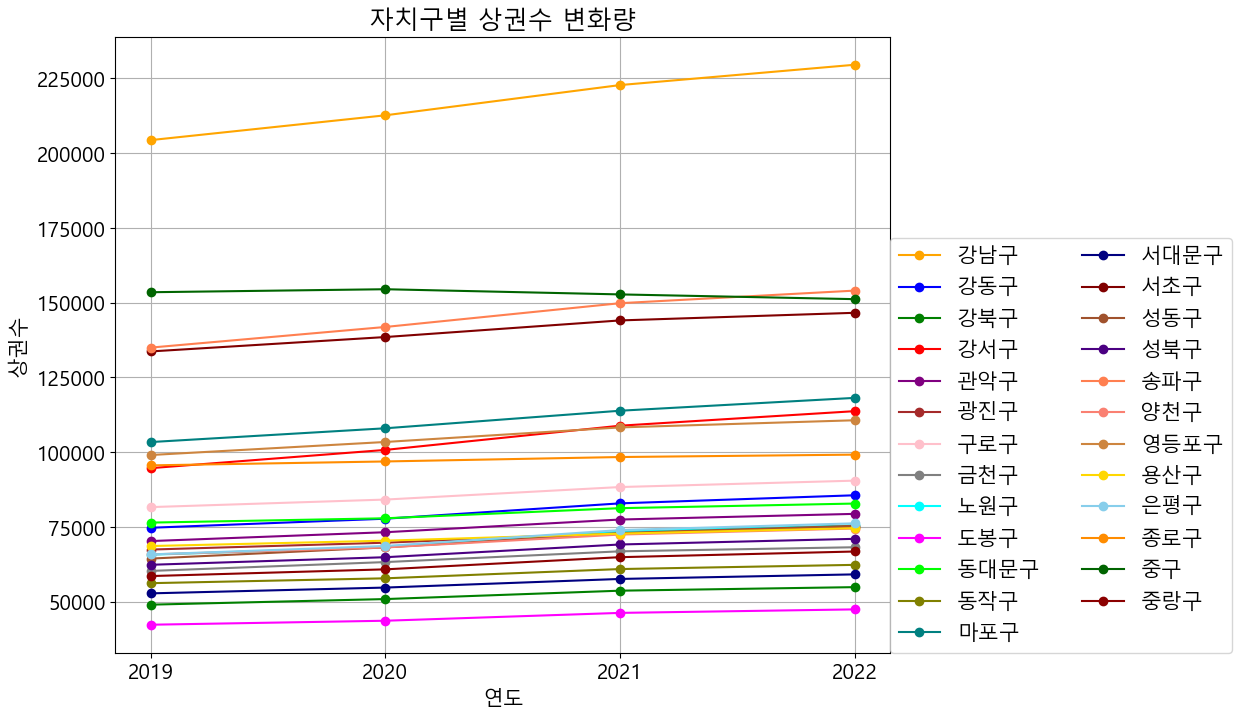

In [31]:
colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lime', 'olive', 'teal', 'navy', 'maroon', 'sienna', 'indigo', 'coral', 'salmon',
          'peru', 'gold', 'skyblue', 'darkorange', 'darkgreen', 'darkred']
color_index = 0

plt.figure(figsize=(10, 8))
for index, row in temp.iterrows():
    plt.plot(temp.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 상권수 변화량')
plt.xlabel('연도')
plt.ylabel('상권수')
plt.legend(loc=(1,0), ncol=2)
plt.grid(True)

plt.show()

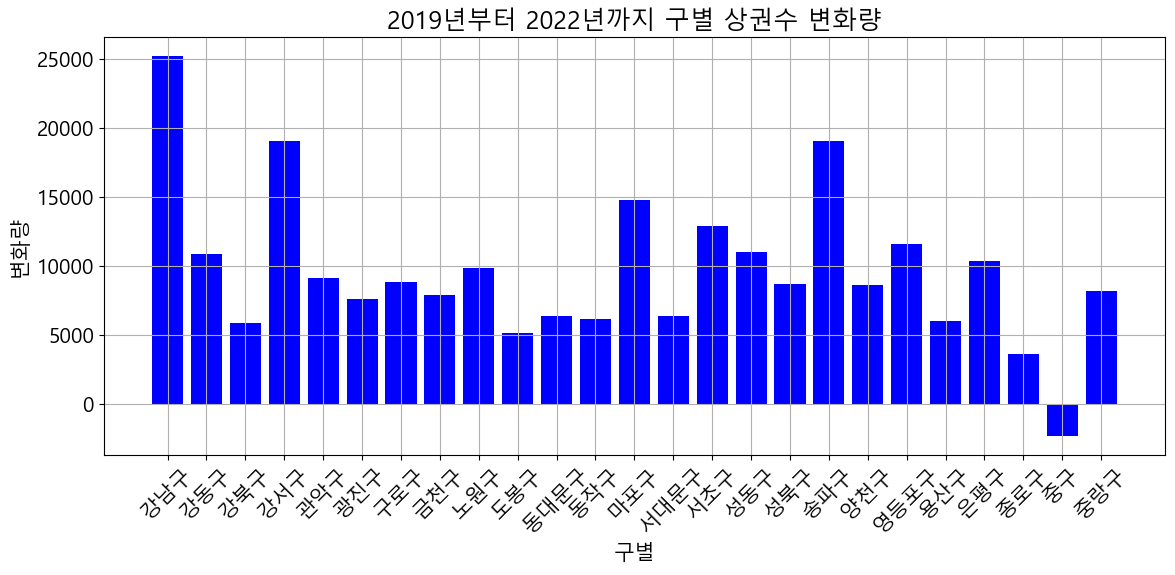

In [44]:
df = pd.DataFrame(temp)
#df.set_index('자치구별', inplace=True)
df['변화량'] = df['2022'] - df['2019']

plt.figure(figsize=(12, 6))
plt.bar(df.index, df['변화량'], color='b')
plt.title('2019년부터 2022년까지 구별 상권수 변화량')
plt.xlabel('구별')
plt.ylabel('변화량')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

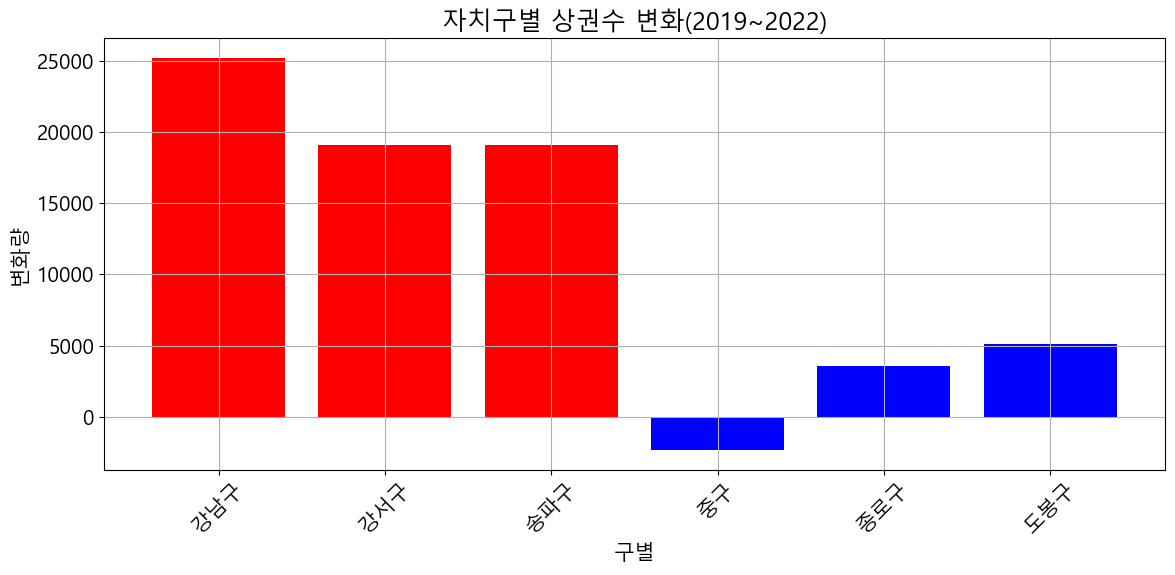

In [46]:
df['변화량'] = df['2022'] - df['2019']

df['변화량'] = pd.to_numeric(df['변화량'])

top_3 = df.nlargest(3, '변화량', keep='all')
bottom_3 = df.nsmallest(3, '변화량', keep='all')
top_bottom_df = pd.concat([top_3, bottom_3])

top_bottom_df['색상'] = ['red'] * len(top_3) + ['blue'] * len(bottom_3)

# 상위 3개와 하위 3개를 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_bottom_df.index, top_bottom_df['변화량'], color=top_bottom_df['색상'])
plt.title('자치구별 상권수 변화(2019~2022)')
plt.xlabel('구별')
plt.ylabel('변화량')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('자치구별 상권수 변화(2019~2022)', bbox_inches='tight')
plt.show()